In [1]:
device = "cpu"
# device = "cuda"
import time,os,copy
import idx2numpy 
import numpy as np 
from tqdm import tqdm

seed = 42
np.random.seed(seed)

# Plotting
import matplotlib.pyplot as plt

# OpenMP: number of parallel threads.
os.environ["OMP_NUM_THREADS"] = "16"

create = False

class_names = [
    "6",
    "7",
    "8",
    "9"
]
num_classes = len(class_names)


array([3, 0, 1, ..., 2, 0, 2])

16788 7195
16788 7195
7195 7195 16788 16788


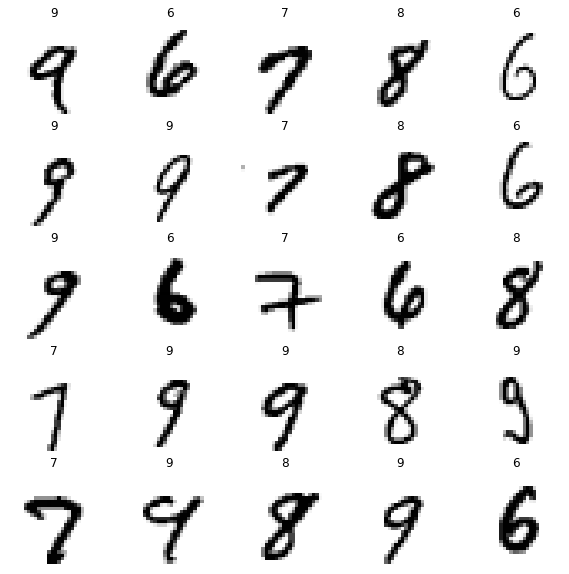

In [2]:
arr3 = []
arr4 = []
file1 = './MNIST/raw/train-images-idx3-ubyte' 
arr = idx2numpy.convert_from_file(file1)
file2 = './MNIST/raw/train-labels-idx1-ubyte' 
arr2 = idx2numpy.convert_from_file(file2)
for i in range(len(arr)):
    if arr2[i] in [6,7,8,9]:
        arr3.append(arr[i])
        arr4.append(arr2[i])

n_steps = 10
train_images = np.asarray(arr3,dtype=np.float32) / 255.0
train_labels = np.asarray(arr4,dtype=np.int64)
train_labels -= 6
display(train_labels)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])

# splitting the full dataset of 5 classes into test and train images to ensure the testing does not happen on images from train data.
split = np.array_split(train_images,[int(len(train_images)*0.7)])
train_sequences = split[0]
test_sequences = split[1]
print(len(split[0]),len(split[1]))
split = np.array_split(train_labels,[int(len(train_labels)*0.7)])
train_labels = split[0]
test_labels = split[1]
print(len(split[0]),len(split[1]))
datalength = 5000
# we restrict the training to first 5000 images of 21000
train_sequences = np.tile(train_sequences[:, None], (1, n_steps, 1, 1))#[:datalength]
test_sequences = np.tile(test_sequences[:, None], (1, n_steps, 1, 1))
# train_labels = train_labels[:datalength]
if create:
    np.savez_compressed("./saved_data_MNIST_last4/test_labels.npz",test_labels)
    np.savez_compressed(f"./saved_data_MNIST_last4/test_seqs_{seed}.npz",test_sequences)
    np.savez_compressed("./saved_data_MNIST_last4/train_labels.npz",train_labels)
    np.savez_compressed(f"./saved_data_MNIST_last4/train_seqs_{seed}.npz",train_sequences)

print(len(test_labels),len(test_sequences),len(train_labels),len(train_sequences))

# Salt and pepper

In [3]:
def salt_pepper(test_sequences,test_labels,prob,salt=0,pepper=1):
  sampled_images = test_sequences
  sampled_labels = test_labels
  for j in range(len(test_labels)):
    for i in range(np.shape(sampled_images[j])[0]):
      for y in range(28):
        for x in range(28):
          r = np.random.random() 
          if r < prob:
            sampled_images[j][i][y][x] = salt
          elif r > 1-prob:
            sampled_images[j][i][y][x] = pepper
  return sampled_images,sampled_labels

In [4]:
if create:
    for i in range(1,10,1):
        d , l =salt_pepper(np.load(f"./saved_data_MNIST_last4/test_seqs_{seed}.npz")['arr_0'],np.load(f"./saved_data_MNIST_last4/test_labels.npz")['arr_0'],i/100.0)
        np.savez_compressed(f"./saved_data_MNIST_last4/snp_{i/100.0}_{seed}.npz",d)
    for i in range(1,6,1):
        d , l =salt_pepper(np.load(f"./saved_data_MNIST_last4/test_seqs_{seed}.npz")['arr_0'],np.load(f"./saved_data_MNIST_last4/test_labels.npz")['arr_0'],i/10.0)
        np.savez_compressed(f"./saved_data_MNIST_last4/snp_{i/10.0}_{seed}.npz",d)

noise probability = 0.02
noise probability = 0.04
noise probability = 0.06
noise probability = 0.08
noise probability = 0.1
noise probability = 0.12
noise probability = 0.14
noise probability = 0.16
noise probability = 0.18
noise probability = 0.2
noise probability = 0.4
noise probability = 0.6
noise probability = 0.8
noise probability = 1.0


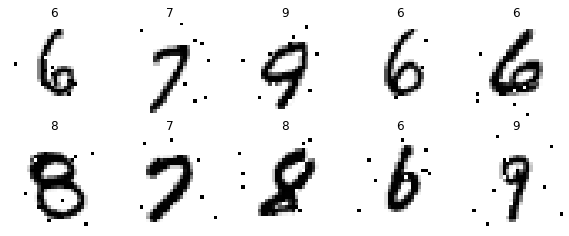

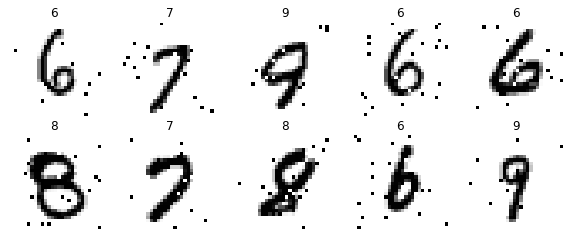

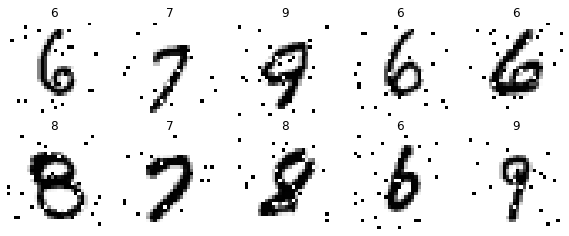

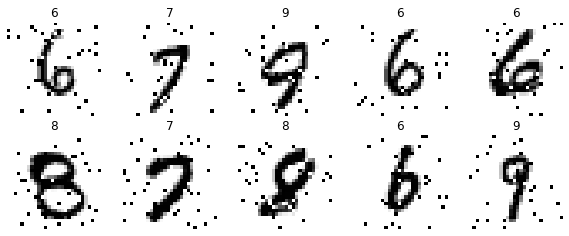

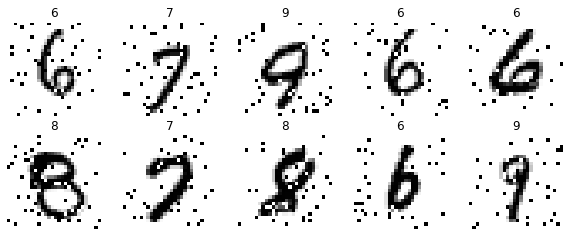

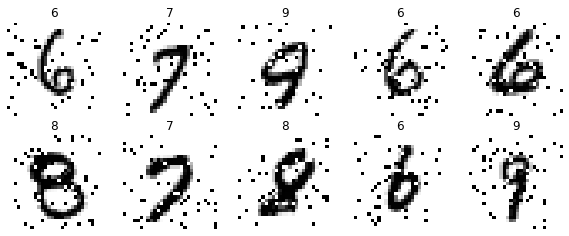

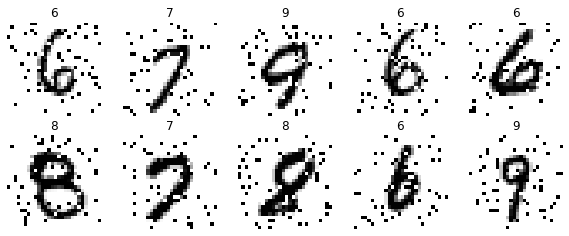

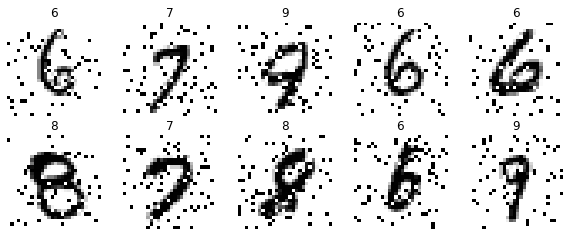

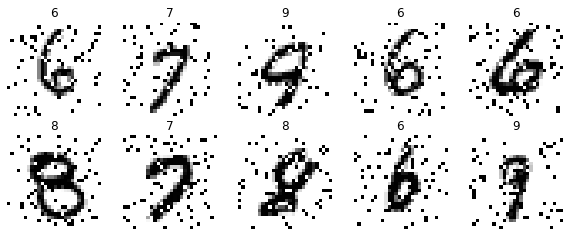

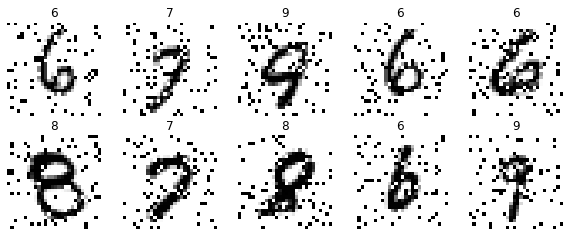

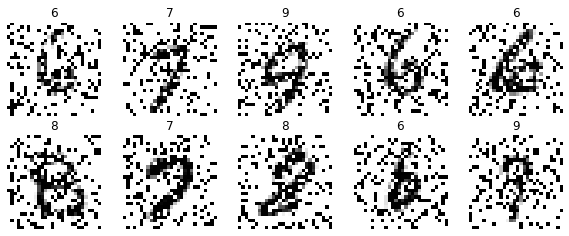

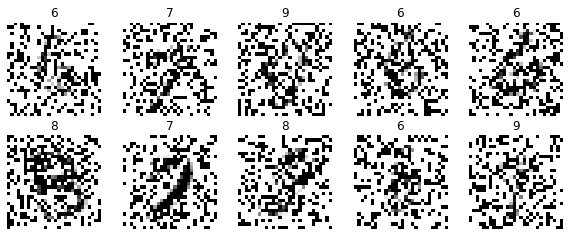

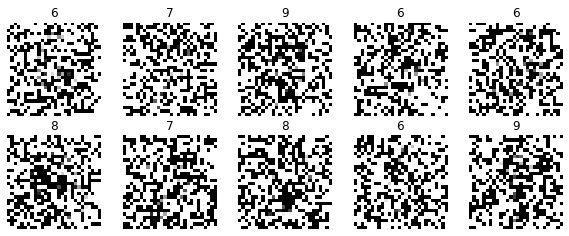

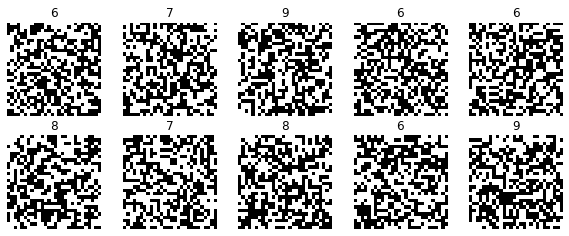

In [5]:
for ii in range(1,10,1):
    print(f"noise probability = {2*ii/100.}")
    d = np.load(f"./saved_data_MNIST_last4/snp_{ii/100.0}_{seed}.npz")['arr_0']
    l = np.load(f"./saved_data_MNIST_last4/test_labels.npz")['arr_0']
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(d[i+2][0], cmap=plt.cm.binary)
        plt.axis("off")
        plt.title(class_names[l[i+2]])
    #plt.show()
    plt.savefig(f"./saved_data_MNIST_last4/snp_{str(ii/100.0)}.png",dpi=500,transparent=False)
    plt.savefig(f"./saved_data_MNIST_last4/snp_{str(ii/100.0)}.ps")
     
     
for ii in range(1,6,1):
    print(f"noise probability = {2*ii/10.}")
    d = np.load(f"./saved_data_MNIST_last4/snp_{ii/10.0}_{seed}.npz")['arr_0']
    l = np.load(f"./saved_data_MNIST_last4/test_labels.npz")['arr_0']
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(d[i+2][0], cmap=plt.cm.binary)
        plt.axis("off")
        plt.title(class_names[l[i+2]])
    #plt.show()
    plt.savefig(f"./saved_data_MNIST_last4/snp_{str(ii/10.0)}.png",dpi=500,transparent=False)
    plt.savefig(f"./saved_data_MNIST_last4/snp_{str(ii/10.0)}.ps")

# Gaussian

In [6]:
if create:
  for i in tqdm([i for i in range(1,10)]+[i/10 for i in range(1,10)]):
    sampled_images = np.load(f"./saved_data_MNIST_last4/test_seqs_{seed}.npz")['arr_0']
    sampled_labels = np.load("./saved_data_MNIST_last4/test_labels.npz")['arr_0']
    sigma = (i*0.1)**0.5
    mean = 0
    for j in range(len(sampled_labels)):
      for _ in range(len(sampled_images[j])):
        row,col = sampled_images[j][_].shape
        # gauss = np.array(np.random.normal(mean,sigma,size=(28,28))).reshape(row,col)
        gauss = np.array(np.random.randn(row*col)) #* var ** 0.5 + mean
        gauss = gauss*sigma + mean
        gauss = gauss.reshape(row,col)
        sampled_images[j][_] = sampled_images[j][_] + gauss
    np.savez_compressed(f"./saved_data_MNIST_last4/gauss_{i/10.}_{seed}.npz",sampled_images)

gaussian noise sigma = 0.01
gaussian noise sigma = 0.02
gaussian noise sigma = 0.03
gaussian noise sigma = 0.04
gaussian noise sigma = 0.05
gaussian noise sigma = 0.06
gaussian noise sigma = 0.07
gaussian noise sigma = 0.08
gaussian noise sigma = 0.09
gaussian noise sigma = 0.1
gaussian noise sigma = 0.2
gaussian noise sigma = 0.3
gaussian noise sigma = 0.4
gaussian noise sigma = 0.5
gaussian noise sigma = 0.6
gaussian noise sigma = 0.7
gaussian noise sigma = 0.8
gaussian noise sigma = 0.9


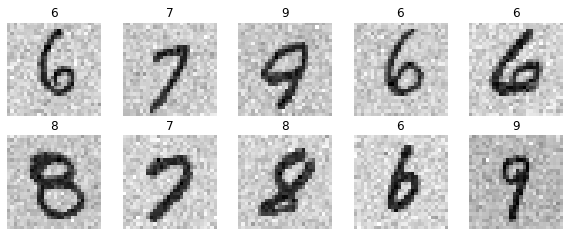

In [ ]:
for ii in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"gaussian noise sigma = {ii}")
    d = np.load(f"./saved_data_MNIST_last4/gauss_{ii}_{seed}.npz")['arr_0']
    l = np.load(f"./saved_data_MNIST_last4/test_labels.npz")['arr_0']
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(d[i+2][0], cmap=plt.cm.binary)
        plt.axis("off")
        plt.title(class_names[l[i+2]])
    #plt.show()
    plt.savefig(f"./saved_data_MNIST_last4/gauss_{str(ii)}.png",dpi=500,transparent=False)
    plt.savefig(f"./saved_data_MNIST_last4/gauss_{str(ii)}.ps")

# Perlin

In [ ]:
def generate_perlin_noise_2d(shape, res):
    def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3

    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:,1:].repeat(d[0], 0).repeat(d[1], 1)
    # Ramps
    n00 = np.sum(grid * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1])) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0], grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = f(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)


In [ ]:
sampled_images = np.load(f"./saved_data_MNIST_last4/test_seqs_{seed}.npz")['arr_0']
sampled_labels = np.load(f"./saved_data_MNIST_last4/test_labels.npz")['arr_0']
for res in [1,14,7]:
    if create:
        for i in range(len(sampled_labels)):
            texture = generate_perlin_noise_2d((28,28),(res,res))
            for j in range(10):
                sampled_images[i][j] += texture
        np.savez_compressed(f"./saved_data_MNIST_last4/perlin_{res}_x_{res}_{seed}.npz",sampled_images)

    d = np.load(f"./saved_data_MNIST_last4/perlin_{res}_x_{res}_{seed}.npz")['arr_0']
    l = np.load(f"./saved_data_MNIST_last4/test_labels.npz")['arr_0']
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(d[i+2][0], cmap=plt.cm.binary)
        plt.axis("off")
        plt.title(class_names[l[i+2]])
    #plt.show()
    plt.savefig(f"./saved_data_MNIST_last4/perlin_{str(res)}.png",dpi=500,transparent=False)
    plt.savefig(f"./saved_data_MNIST_last4/perlin_{str(res)}.ps")

# Rayleigh

In [ ]:
if create:
  for i in tqdm([i/100 for i in range(1,10)]+[i/10 for i in range(1,10)]):
    sampled_images = np.load(f"./saved_data_MNIST_last4/test_seqs_{seed}.npz")['arr_0']
    sampled_labels = np.load("./saved_data_MNIST_last4/test_labels.npz")['arr_0']
    for j in range(len(sampled_labels)):
      for _ in range(len(sampled_images[j])):
        row,col = sampled_images[j][_].shape
        rayl = np.array(np.random.rayleigh(i,row*col)).reshape(28,28) 
        sampled_images[j][_] += rayl
    np.savez_compressed(f"./saved_data_MNIST_last4/rayl_{i}_{seed}.npz",sampled_images)

In [ ]:
for ii in [i/100 for i in range(1,10)]+[i/10 for i in range(1,10)]:
    d = np.load(f"./saved_data_MNIST_last4/rayl_{ii}_{seed}.npz")['arr_0']
    l = np.load(f"./saved_data_MNIST_last4/test_labels.npz")['arr_0']
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(d[i+2][0], cmap=plt.cm.binary)
        plt.axis("off")
        plt.title(class_names[l[i+2]])
    #plt.show()
    plt.savefig(f"./saved_data_MNIST_last4/rayl_{str(ii)}.png",dpi=500,transparent=False)
    plt.savefig(f"./saved_data_MNIST_last4/rayl_{str(ii)}.ps")  

# Uniform

In [ ]:
if create:
  for i in tqdm([i/100 for i in range(1,10)]+[i/10 for i in range(1,10)]):
    sampled_images = np.load(f"./saved_data_MNIST_last4/test_seqs_{seed}.npz")['arr_0']
    sampled_labels = np.load("./saved_data_MNIST_last4/test_labels.npz")['arr_0']
    for j in range(len(sampled_labels)):
      for _ in range(len(sampled_images[j])):
        row,col = sampled_images[j][_].shape
        rayl = np.array(np.random.uniform(0,i,row*col)).reshape(28,28) 
        sampled_images[j][_] += rayl
    np.savez_compressed(f"./saved_data_MNIST_last4/uniform_0_{i}_{seed}.npz",sampled_images)

In [ ]:
for ii in tqdm([i/100 for i in range(1,10)]+[i/10 for i in range(1,10)]):
    d = np.load(f"./saved_data_MNIST_last4/uniform_0_{ii}_{seed}.npz")['arr_0']
    l = np.load(f"./saved_data_MNIST_last4/test_labels.npz")['arr_0']
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(d[i+2][0], cmap=plt.cm.binary)
        plt.axis("off")
        plt.title(class_names[l[i+2]])
    #plt.show()
    plt.savefig(f"./saved_data_MNIST_last4/uniform_{str(ii)}.png",dpi=500,transparent=False)
    plt.savefig(f"./saved_data_MNIST_last4/uniform_{str(ii)}.ps")